In [48]:
#Import the Libraries
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

In [53]:
#create variables with api keys to fetch data from twitter
login = pd.read_csv('keys.csv')
consumer_key = login['keys'][0]
consumer_secret = login['keys'][1]
acess_token = login['keys'][2]
access_secret = login['keys'][3]

In [11]:
#authenticate the keys
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
#set the access tokens
authenticate.set_access_token(acess_token, access_secret)
#set api while passing auth
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [12]:
# Create a variable for search term and tweet counts
search_term = 'Neuralink'
tweet_count = 1500
#load the tweets
tweets = tweepy.Cursor(api.search, 
                       q=search_term, 
                       lang='en',
                       tweet_mode='extended').items(tweet_count)

#For fetching tweets from a user
#tweets = api.user_timeline(screen_name = 'elonmusk', count= 1000, lang = 'en', tweet_mode='extended')

In [13]:
#feed tweets as a list in the variable 'data' 
data = [[tweet.full_text] for tweet in tweets]

In [14]:
#Create a dataframe of the tweets with a column named Tweets
df = pd.DataFrame(data=data, columns=['Tweets'])

#Show head of the df
df.head()

,Tweets
0,"@ElonsWorld In ten years, probably Tesla. Sta..."
1,Please consider using Neuralink to cure tinnit...
2,RT @ArtVolumeOne: How you look is totally mean...
3,Is there a chance you might have some technolo...
4,@venus47203379 @wonderofscience If we add some...


In [15]:
#Clean the text

#Create a function to clean the text
def clean_text(text):
  text = re.sub(r'#', '', text) #removing hash_tags
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing mentions
  text = re.sub(r'_', '', text) #further cleaning
  text = re.sub(r':', '', text) #removing semicolons
  text = re.sub(r'https:?\/\/\S+', '', text) #removing hyperlinks
  text = re.sub(r'RT[\s]+', '', text) # removing retweets

  return text

df['Tweets'] = df['Tweets'].apply(clean_text)

df.head()

,Tweets
0,"In ten years, probably Tesla. Starlink will ..."
1,Please consider using Neuralink to cure tinnit...
2,How you look is totally meaningless AI will k...
3,Is there a chance you might have some technolo...
4,If we add some Neuralink to this creature co...


In [16]:
df.shape

(1500, 1)

In [17]:
#get subjectivity of the text
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#get polarity of the text
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

#apply subjectivity and polarity to the text and create two new columns 
#Polarity shows whether the text is negative, positive, or neutral

df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

#Show head of new df
df.head()

,Tweets,Subjectivity,Polarity
0,"In ten years, probably Tesla. Starlink will ...",0.620000,0.240000
1,Please consider using Neuralink to cure tinnit...,0.600000,-0.625000
2,How you look is totally meaningless AI will k...,0.625000,-0.125000
3,Is there a chance you might have some technolo...,0.666667,0.412121
4,If we add some Neuralink to this creature co...,0.000000,0.000000


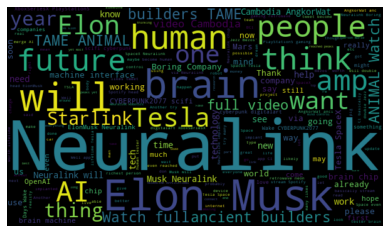

In [38]:
#Visualize wordcloud of the text to show more frequent words
allwords = ' '.join(twts for twts in df['Tweets'])
word_cloud = WordCloud(width=600, 
                       height=350, 
                       random_state=21, 
                       max_font_size=120).generate(allwords)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#Def a function to get Polarity analysis. Positive, Neutral, and Negative

def get_analysis(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'

df['Analysis'] = df['Polarity'].apply(get_analysis)

#show the head of the new df

df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"In ten years, probably Tesla. Starlink will ...",0.620000,0.240000,Positive
1,Please consider using Neuralink to cure tinnit...,0.600000,-0.625000,Negative
2,How you look is totally meaningless AI will k...,0.625000,-0.125000,Negative
3,Is there a chance you might have some technolo...,0.666667,0.412121,Positive
4,If we add some Neuralink to this creature co...,0.000000,0.000000,Neutral


In [20]:
#print all the positive tweets
n = 1
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]):
  if(sorted_df['Analysis'][i] == 'Positive'):
    print(str(n)+ ') ' + sorted_df['Tweets'][i])
    print()
    n = n+1

1)  In ten years, probably Tesla.  Starlink will give them a good run though for SpaceX (unless separate.)

But ultimately if Neuralink can do what they hope it can do, that will be 1.  However will most likely take 20+ years.

2) Is there a chance you might have some technology to help her brain? I have read in articles about your neuralink and all the amazing things you are working on. We live in Australia and would love to hear from you. Please if you read this. Reach out to me. 

3)  What are the voltages and amperes traveling through the  receptors? When voltage is applied, will the patient feel any of it? Thanks.

4)  All these tech companies will soon reach escape velocity! They ain’t seen nothing yet! We are in a secular bull market! Medieval Institutions will soon crumble to Tech. Our Paleolithic minds just don’t get it! Maybe if we had a Neuralink attached to us we would be okay. Tech

5) Absolutely love this piece about Space Karen &amp; his Neuralink! Plus it comes beautifu

In [21]:
#Print the negative tweets
n = 1
sorted_df = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sorted_df.shape[0]):
  if(sorted_df['Analysis'][i] == 'Negative'):
    print(str(n)+ ') ' + sorted_df['Tweets'][i])
    print()
    n = n+1

1) Please consider using Neuralink to cure tinnitus. Sounds waves are transformed to bio-electro signals. Neuralink will work to modify these the bio- electro signals to reduce or eliminate the erroneous signals from the cochlea nerve.
Please help!



2) How you look is totally meaningless  AI will know exactly who you are at all times. EnergyProtoco…

3) Brainmachineinterface has been around for a long time, but Neuralink is trying to break into areas other than medicine, such as ENTERTAINMENT!
FUTURE IS GOING TO BE WEIRD!


4) Absolutely no one

Me Have you heard about Neuralink?

5)  2024 "All Tweets must be approved by Twitter before posting"

2028 Employer-tied Internet access (service provided by Amazon)

2032 If you think negative thoughts about Supreme Leader Buttigieg, your Neuralink chip will produce a constant, gradually stronger electric shock

6)     I suppose I'm the odd one out who considers stories like Ghost in the Shell and Akira to be tragedies?

7) Day 100 of tweeti

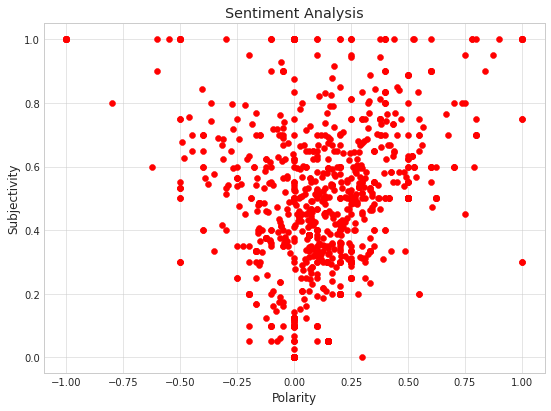

In [49]:
#Scatter plot the subjectivity and polarity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [23]:
#Get the percentage of positive tweets

p_tweets = df[df.Analysis == 'Positive']
p_tweets_p = p_tweets['Tweets']

positive = round((p_tweets_p.shape[0] / df.shape[0])*100, 1)
print(positive)

46.7


In [24]:
#Get the percentage of negative tweets

p_tweets = df[df.Analysis == 'Negative']
p_tweets_n = p_tweets['Tweets']

negative = round((p_tweets_n.shape[0] / df.shape[0])*100, 1)
print(negative)

15.9


In [25]:
#Get the percentage of neutral tweets

neutral = round(100 - (positive + negative))
print(neutral)

37


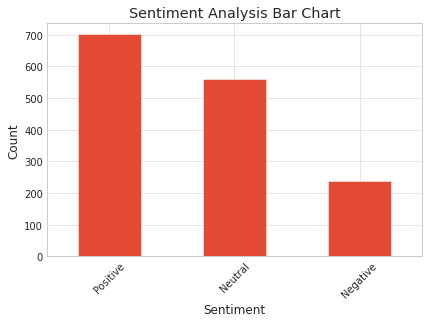

In [54]:
#Visualize the vlue counts of the sentiment
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Chart')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()